## Assignment 3
Name: Eve Tarpey Date: 29/10/23

### Introduction: Information we are given in assignment
#### The Rectangle rule
The rectangle rule is the simplest way to integrate a well behaved function. 
In the rectangle rule, the area under the curve is approximated by the sum of the area of a number of rectangles. 



The width of each rectangle (h), is determined by the division of the interval into n segments:

$$ \frac{b-a}{n} = h $$


The approximation of the integral using the rectangle rule is expressed as:
$$ I \approx \sum_{i=0}^{n-1} f(x_i)h $$

Where:

- $I$ represents the integral of the function over [a,b].
- $f(x_i)$ is the value of the function f(x) at the left edge of the i-th rectangle.
- h is the width of each rectangle, as determined by the division of the interval into n segments.

#### The Monte Carlo method for solving a definite well-behaved integral
Monte Carlo method 
- Specify the integration limits in x to give a range xmin to xmax.
- Evaluate the maximum of the function between the limits in x (this can be done by plotting, or analytically). This gives a ymax, and the minimum value of y is zero. There is now a box area defined by these x and y values. The integral is the area under the curve so the ratio of the box area to the area under the curve can be used to estimate the integral.

For a large number of trials, do the following three steps:
- Create random number pair (x, y) by generating a random x in the range xmin to xmax and a random y in the range 0 and ymax.
- Test if the random number pair lies above or below the function f (x) by evaluating by substitution whether f (x) is less than or equal to y.
- If the random number pair is under or on the curve, add one to the summation. If it is above the curve, do not add to the summation.
- The integral is then found from: summation/trials ' integral/box area.

--------------------------------------------------------------------------------------------

### Task 1:
Directly program the rectangle rule to give a numerical estimate for $$ \int_a^b f(x)  = \int_a^b cos^2(\pi x) $$

Where
- $ f(x) = cos^2(\pi x) $
- Let a = -1/3 and b = 1/3
- Let n = 100 iterations

In [93]:
import numpy as np                                              # import numpy to perform mathematical operations

# define the function f(x) to calculate f(x) = cos^2(pi*x) using rectangle rule method
def f(x):
    return np.cos(np.pi * x) **2

# define the parameters
n = 100                                                         # number of iterations
a = float(input("Lower limit of integration: "))                # prompt for the user to input the value for a
b = float(input("Upper limit of integration: "))                # prompt for the user to input the value for b
                                                        
# define the rectangle rule to allow for numerical integration
def rectangle(a, b, n):
    h = (b - a) / n                                             # to find the width of each rectangle
    integral = 0                                                # initialise the integral to 0
    
# initiate a loop to run n times. let r take values from 0 to n-1
    for r in range(n):                                          
        xr = a + r * h                                          # calculate the x coordinate for left of the rectangle
        integral += f(xr)                                       # compute the value of f(x) at the x coordinate xr
    integral *= h                                               # to get the total area under the curve
    
    return integral                                             # to return the total area

result = rectangle(a, b, n)

print("--------------------------------------------------------")

# print the numerical estimate for the integral to 6 decimal places
print(f"The numerical estimate for the integral of f(x) is: {result: .6g}")

Lower limit of integration: -.3333333
Upper limit of integration: .3333333
--------------------------------------------------------
The numerical estimate for the integral of f(x) is:  0.471145


### Summary of code in Task 1:

- Define the function $f(x) = cos^{2}(\pi x) $ to be used in rectangle rule method.


- Set the number of iterations (n) = 100.


- Prompt the user to enter the lower and upper limits of integration (a and b). 

We were not given specific limits, so I used a=-1/3 and b=1/3. If they were incorrect parameters, the code then allows you to change! :)

- Define the function rectangle(a, b, n) to implement the rectangle rule for numerical integration.


- Use a loop to iterate through n rectangles.


- Call the rectangle function with the specified parameters and store the result.


- Print the numerical estimate for the integral of f(x) to 6 decimal places for accuracy.

## Task 2: 

- Use scipy.integrate to import quad to calculate an accurate value for the integral.
- Include an estimated error value.

In [97]:
from scipy.integrate import quad                                # to perform numerical integration

# using the values from task 1, return the result and an estimated error for extra accuracy !

result, error = quad(f, a, b)    

# print the result of the numerical integration to 6 decimal places and the estimated error associated to 3 decimal places

print(f"The result of numerical integration +/- the error value is: {result:.6g} +/- {error:.3g}")

The result of numerical integration +/- the error value is: 0.471166 +/- 5.23e-15


### Summary of code in Task 2:

- Use the quad function from the scipy.integrate module to calculate an accurate value of the integral, rather than an estimated value.


- Include an error for added accuracy.


- Print the results.

## Task 3:
A numerical method is Nth order if the accuracy, $ \eta \propto n^{-N} $ .
$$ \eta = \frac{|measured − expected|}{expected} $$



- Using the accurate expected value for the integral from Task 2, investigate the performance of the rectangle rule by varying the number of iterations by factors of 10 (i.e. 10, 100, 1000, 10000,....) steps. 

- Plot the relative accuracy of the algorithm versus the number of steps
- Identify the order of the algorithm.


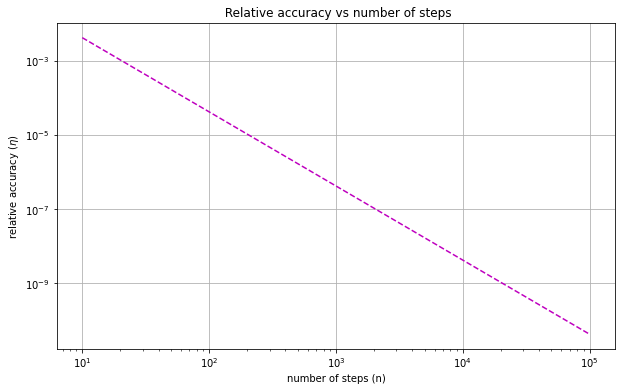

In [11]:
import matplotlib.pyplot as plt                                # import matplotlib.pyplot as plt to plot the graph 

# calculate the expected value for the integral, f is being integrated, and a and b are our limits. 
expected, _ = quad(f, a, b)                                    

# vary the number of iterations by factors of 10 and store them in a list
iterations = [10, 100, 1000, 10000, 100000]      

# initialise a list to store relative accuracies in order to plot them on our graph
relative_accuracies = []

# calculate the numerical estimate for each n value using the rectangle rule 
for n in iterations:
    measured = rectangle(a, b, n)     
    
    # compute relative accuracy
    relative_accuracy = abs(measured - expected) / expected
    
    relative_accuracies.append(relative_accuracy)              # append the result to the relative_accuracies list

plt.figure(figsize=(10, 6))                                    # to enlarge the graph

# plot the relative accuracy vs the number of steps, use a log scale in order to identify the order of the algorithm

plt.loglog(iterations, relative_accuracies, "m--")             # to plot the log scale graph
plt.title(" Relative accuracy vs number of steps")             # to title the graph
plt.xlabel("number of steps (n)")                              # to label the x axis
plt.ylabel("relative accuracy ($\eta$)")                       # to label the y axis
plt.grid()                                                     # to display a grid
plt.show()                                                     # to show the graph

To identify the order of the algorithm, we need to analyze how the relative accuracy changes as the number of steps increases.
$ \eta \propto n^{-N} $

In [96]:
# in order to analyse the relationship between log(iterations) and log(relative accuracies)
from scipy.stats import linregress as linear

# converts the lists to logarithmic scale
log_iterations = np.log10(iterations)                           
log_accuracies = np.log10(relative_accuracies)

# calculate the slope of the line of best fit
slope, intercept, r_value, p_value, std_err = linear(log_iterations, log_accuracies)

# print the value of the slope in order to identify the order
print(f"The slope of the graph: {slope:.3g}")                    

The slope of the graph: -2


This shows us that the numerical method is second order: $ \eta \propto n^{2} $

I originally expected the algorithm to be of order 1, but I thought that using the slope of the graph would give the correct answer - thus I got the answer above.

### Summary of code in Task 3:
- Calculate the expected value (expected) of the integral using the quad function.


- Create a list (iterations) containing the number of steps for the rectangle rule.


- Initialize an empty list (relative_accuracies) to store the relative accuracies.


- Iterate through the list of iterations and calculate the numerical estimate for each n using the rectangle function defined in task 1.


- Compute the relative accuracy and append to the relative_accuracies list.


- Create a plot (relative accuracy of the algorithm versus the number of steps) with a logarithmic scale on both axes.


Then, in order to identify the order of the algorithm:
- Import the linregress function from the scipy.stats module.


- Convert lists to logarithmic scale and store them as log_iterations and log_accuracies.


- Calculate the slope, intercept, correlation coefficient (r_value), p-value (p_value), and standard error (std_err) of the regression line.


- Print the slope of the regression line. 


Then identify the order of the algorithm!


## Task 4: Monte Carlo method
- Generate a code to calculate:  $$ \int_a^b f(x)  = \int_a^b cos^2(\pi x) $$ using the Monte Carlo method.


- Make a plot of the performance of the Monte Carol method versus number of trials.


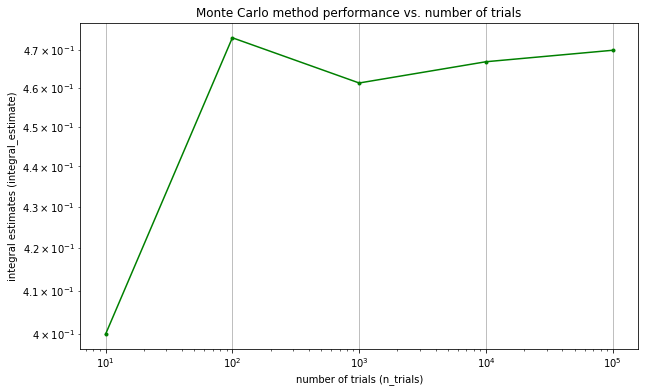

Monte Carlo integral estimate: 0.47246


In [112]:
# define the function f(x) to calculate f(x) = cos^2(pi*x) using Monte Carlo method
def f(x):
    return np.cos(np.pi * x) ** 2

# n_trials = number of random points generated for the Monte Carlo method, a and b are integration limits
def monte_carlo(a, b, n_trials):       
    
    xmin, xmax = a, b                                 # determine the minimum (xmin) and maximum (xmax) values 
    
    ymax = np.max(f(np.linspace(xmin, xmax, 1001)))   # calculate the maximum value of the function within the given range
    
    box_area = (xmax - xmin) * ymax                   # calculate the box area
    
    summation = 0                                     # to initialise the summation variable

    for _ in range(n_trials):                         # loop iterates through n_trails
        
        # generate a random point x within the limits [xmin and xmax]
        x = np.random.uniform(xmin, xmax)    
        
        # generate a random point y within the limits [0, ymax], y is the random height of a point within the box
        y = np.random.uniform(0, ymax)                 
        
        if y <= f(x):                                 # to check if randomly generated point lies on or under the curve                           
            summation += 1                            # add 1 to summation variable if the point lies on or under curve

    # calculate the estimated value of the integral using the Monte Carlo method        
    integral_estimate = (summation / n_trials) * box_area
    return integral_estimate

# define integration limits and number of trials
a = -1/3                                               # using a= -1/3 as in intro example
b = 1/3                                                # using b = 1/3 as in intro example
n_trials = [10, 100, 1000, 10000, 100000]              # using iterations as in task 3

results = []                                           # initialize a list to store the integral estimates

# perform the Monte Carlo method for each number of trials
for n in n_trials:
    mc_result = monte_carlo(a, b, n)
    results.append(mc_result)

plt.figure(figsize=(10, 6))                             # to enlarge the graph

# plot the results using a logarithmic scale
plt.loglog(n_trials, results, marker=".", color="green")

# to title the graph
plt.title("Monte Carlo method performance vs. number of trials")

# to label the x and y axes
plt.xlabel("number of trials (n_trials)")
plt.ylabel("integral estimates (integral_estimate)")

# to display a grid
plt.grid()

# to show the graph
plt.show()

# call monte_carlo_method function with specified parameters
mc_result = monte_carlo(a, b, n_trials[-1])

# print the Monte Carlo integral estimate to 6 significant figures
print(f"Monte Carlo integral estimate: {mc_result:.6g}")


### Summary of code in Task 4:

- Defines the function $f(x) = cos^{2}(\pi x) $


- The monte_carlo_method function takes integration limits [a,b] , and the number of trials (n_trials) as input.


- Generates random points within the specified limits and checks if they fall under or on the curve defined by f(x).


- Accumulates points that meet the condition.


- Calculates the estimated value of the integral using the Monte Carlo method:


$$ \frac{summation}{trials} box area $$

- Initializes a list to store the results and performs the Monte Carlo method for different numbers of trials.


- Plots the results using a logarithmic scale.


- Calls monte_carlo_method with the maximum number of trials.


- Prints the Monte Carlo Integral Estimate.

## Task 5:

- Generalise the method given above into three dimensions to solve the following 3D infinite potential well problem.

In [111]:
# define the integral for a 3D infinite potential well with side length L
def integral(x, y, z, L):
    
    if 0 <= x <= L and 0 <= y <= L and 0 <= z <= L:         # the integral is 1 inside the well and 0 outside
        return 1                                            # if the point is inside the well, return 1
    else:
        return 0                                            # if it is outside the well, return 0

# generalise the Monte Carlo integration in three dimensions
def monte_carlo_3d(L, n_trials2):
    count_in_well = 0                                       # initialises the count for points inside well, summation variable
    
    for _ in range(n_trials2):                              # loop that runs "n_trials2" times
        
        # generate random points within the cube from (0,0,0) to (L,L,L)
        x = np.random.uniform(0, L)
        y = np.random.uniform(0, L)
        z = np.random.uniform(0, L)
        
        # count how many points fall inside the potential well
        count_in_well += integral(x, y, z, L)               # adds either 1 or 0 to count if inside well  
            
   
    volume = L ** 3                                         # the volume of the cube is L^3, unit= m^3
    
    # calculate the integral estimate. use the formula given in task 4: (count_in_well / n_trials2)*volume
    integral_estimate2 = (count_in_well / n_trials2) * volume
    return integral_estimate2

# side length of the potential well
L = float(input("Value for L:"))                             # prompt the user to input a value for L

# number of trials
n_trials2 = 100000                                           # use similar value as in tasks above

# perform Monte Carlo integration
integral_estimate2 = monte_carlo_3d(L, n_trials2)

# print the value for the Monte Carlo integral estimate in 3D
print(f"Monte Carlo integral estimate in 3D for side length {L:.1g}: {integral_estimate2:.3g}")


Value for L:4
Monte Carlo integral estimate in 3D for side length 4: 64


### Summary of code in Task 5:
- Define the function (integral) to determine if a point is inside the well.


- Check if the points are within the boundaries of the cube.


- Define the Monte Carlo integration function.


- Loops "n_trials2" times in order to generate random points.


- Compute volume of cube.


- Calculate the integral estimate (integral_estimate2)


- Input the value for L. 


- No. of trials = 100,000.


- Print the 3d integral estimate.

